In [2]:
import sys
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from few.trajectory.inspiral import EMRIInspiral
from few.amplitude.romannet import RomanAmplitude
from few.amplitude.interp2dcubicspline import Interp2DAmplitude
from few.waveform import FastSchwarzschildEccentricFlux, SlowSchwarzschildEccentricFlux, GenerateEMRIWaveform
from few.utils.utility import (get_overlap, 
                               get_mismatch, 
                               get_fundamental_frequencies, 
                               get_separatrix, 
                               get_mu_at_t, 
                               get_p_at_t, 
                               get_kerr_geo_constants_of_motion,
                               xI_to_Y,
                               Y_to_xI)

from few.utils.ylm import GetYlms
from few.utils.modeselector import ModeSelector
from few.summation.interpolatedmodesum import CubicSplineInterpolant
from few.waveform import SchwarzschildEccentricWaveformBase
from few.summation.interpolatedmodesum import InterpolatedModeSum
from few.summation.directmodesum import DirectModeSum
from few.utils.constants import *
from few.summation.aakwave import AAKSummation
from few.waveform import Pn5AAKWaveform, AAKWaveformBase

In [3]:
use_gpu = False

# keyword arguments for inspiral generator (RunSchwarzEccFluxInspiral)
inspiral_kwargs={
        "DENSE_STEPPING": 0,  # we want a sparsely sampled trajectory
        "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
    }

# keyword arguments for inspiral generator (RomanAmplitude)
amplitude_kwargs = {
    "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
    "use_gpu": use_gpu  # GPU is available in this class
}

# keyword arguments for Ylm generator (GetYlms)
Ylm_kwargs = {
    "assume_positive_m": False  # if we assume positive m, it will generate negative m for all m>0
}

# keyword arguments for summation generator (InterpolatedModeSum)
sum_kwargs = {
    "use_gpu": use_gpu,  # GPU is availabel for this type of summation
    "pad_output": False,
}

from few.waveform import FastSchwarzschildEccentricFlux, SlowSchwarzschildEccentricFlux, GenerateEMRIWaveform

few = FastSchwarzschildEccentricFlux(
    inspiral_kwargs=inspiral_kwargs,
    amplitude_kwargs=amplitude_kwargs,
    Ylm_kwargs=Ylm_kwargs,
    sum_kwargs=sum_kwargs,
    use_gpu=use_gpu,
)

# Fig 3 from the article

In [4]:
# parameters
import numpy as np
M = 1e6
mu = 1e1
p0 = 12.0
e0 = 0.0
theta = 0  # polar viewing angle
phi =np.pi/4 # azimuthal viewing angle
dt = 10.0

wave = few(M, mu, p0, e0, theta, phi, dt=dt, T=1.0)  #

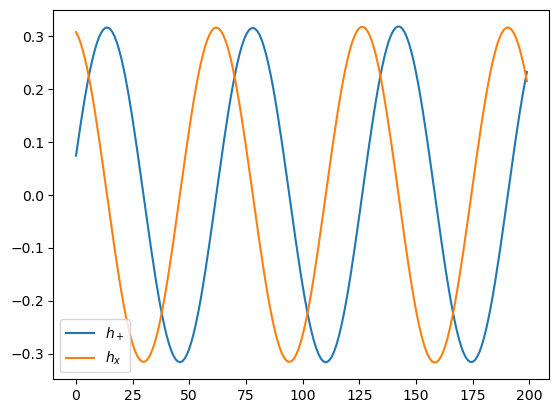

In [5]:

import matplotlib.pyplot as plt

dt = 10.0
t = np.arange(len(wave)) * dt

plt.plot(wave.real[:200],label=r'$h_+$')
plt.plot(wave.imag[:200],label=r'$h_x$')
plt.legend()
plt.show()

In [6]:

theta = np.pi/4  # polar viewing angle
phi =np.pi/4  # azimuthal viewing angle
dt = 10.0

wave = few(M, mu, p0, e0, theta, phi, dt=dt, T=1.0)  #

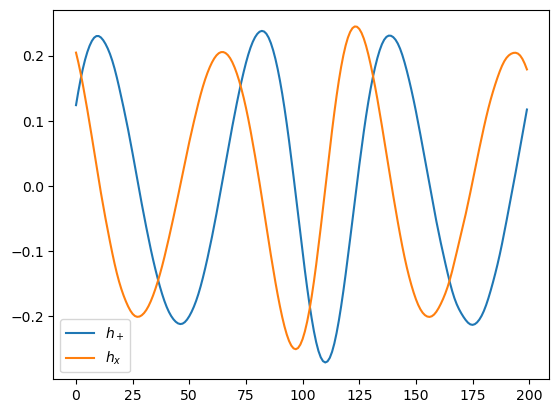

In [7]:

import matplotlib.pyplot as plt

dt = 10.0
t = np.arange(len(wave)) * dt

plt.plot(wave.real[:200],label=r'$h_+$')
plt.plot(wave.imag[:200],label=r'$h_x$')
plt.legend()
plt.show()

In [8]:
theta = np.pi/2  # polar viewing angle
phi =np.pi/4 # azimuthal viewing angle
dt = 10.0

wave = few(M, mu, p0, e0, theta, phi, dt=dt, T=1.0)  #

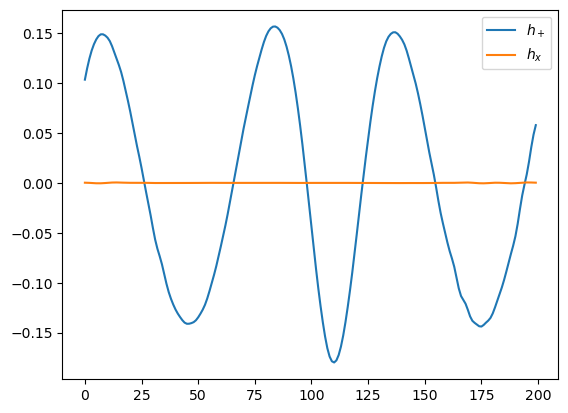

In [9]:

import matplotlib.pyplot as plt

dt = 10.0
t = np.arange(len(wave)) * dt

plt.plot(wave.real[:200],label=r'$h_+$')
plt.plot(wave.imag[:200],label=r'$h_x$')
plt.legend()
plt.show()

In [10]:
M = 1e6
mu = 1e2
p0 = 6.15
e0 = 0.0
theta = 0  # polar viewing angle
phi =np.pi/4 # azimuthal viewing angle
dt = 10.0

wave = few(M, mu, p0, e0, theta, phi, dt=dt, T=1.0)  #

<function matplotlib.pyplot.show(close=None, block=None)>

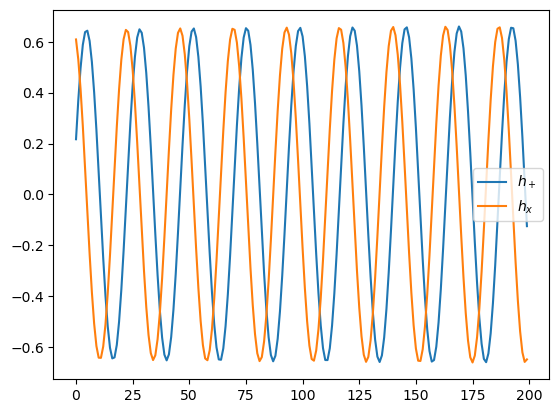

In [11]:
dt = 10.0
t = np.arange(len(wave)) * dt

plt.plot(wave.real[:200],label=r'$h_+$')
plt.plot(wave.imag[:200],label=r'$h_x$')
plt.legend()
plt.show

In [12]:
M = 1e6
mu = 1e-2
p0 = 6.15
e0 = 0.0
theta = np.pi/4  # polar viewing angle
phi =np.pi/4 # azimuthal viewing angle
dt = 10.0

wave = few(M, mu, p0, e0, theta, phi, dt=dt, T=0.5)  #

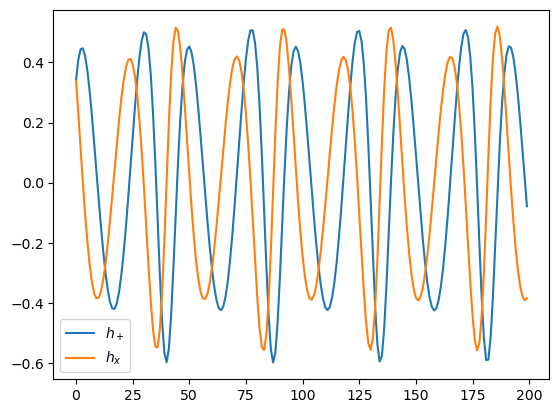

In [13]:
dt = 10.0
t = np.arange(len(wave)) * dt

plt.plot(wave.real[:200],label=r'$h_+$')
plt.plot(wave.imag[:200],label=r'$h_x$')
plt.legend()
plt.show()

In [14]:

M = 6054376180.4942045

mu = 10e-2*6054376180.4942045/(4e6)
p0 = 6.15*M
e0 = 0.0
theta = np.pi/2  # polar viewing angle
phi =0# azimuthal viewing angle
dt = 10
# 1s=1.651×10e-10M
wave = few(M, mu, p0, e0, theta, phi, dt=dt, T=1)  #

/home/masrukuddin/anaconda3/envs/few_env/lib/python3.12/site-packages/few/waveform.py:219: SyntaxWarning: invalid escape sequence '\c'
  """Generate the waveform with the given parameters.
/home/masrukuddin/anaconda3/envs/few_env/lib/python3.12/site-packages/few/waveform.py:506: SyntaxWarning: invalid escape sequence '\l'
  """Call function for SchwarzschildEccentric models.
/home/masrukuddin/anaconda3/envs/few_env/lib/python3.12/site-packages/few/waveform.py:969: SyntaxWarning: invalid escape sequence '\P'
  """Waveform generation class for AAK with arbitrary trajectory.
/home/masrukuddin/anaconda3/envs/few_env/lib/python3.12/site-packages/few/waveform.py:1111: SyntaxWarning: invalid escape sequence '\i'
  """Call function for AAK + 5PN model.
/home/masrukuddin/anaconda3/envs/few_env/lib/python3.12/site-packages/few/waveform.py:1217: SyntaxWarning: invalid escape sequence '\P'
  """Waveform generation class for AAK with 5PN trajectory.
/home/masrukuddin/anaconda3/envs/few_env/lib/pyth

ValueError: Initial p0 is too large (p0=37234413510.03936). Must be 10 <= p0 <= 16 + 2 * e.

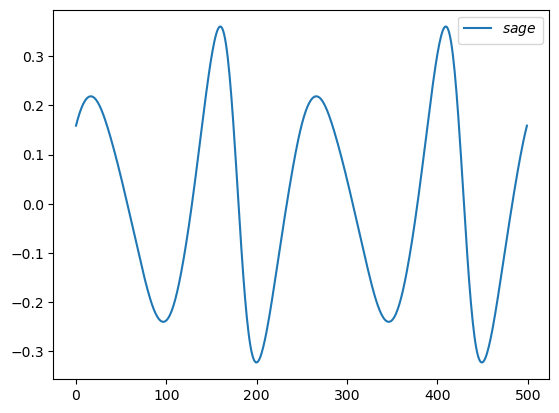

In [40]:
t = np.arange(len(wave)) *dt

realdata=np.loadtxt("output.txt")


np.size(realdata)
plt.figure()
plt.plot(10**17*mu*realdata[0:500]/p0,label=r'$sage$')
# plt.plot(wave.real[:500],label=r'$bhpTK$')
# plt.plot(wave.imag[:500],label=r'$h_x$')
plt.legend()
plt.show()

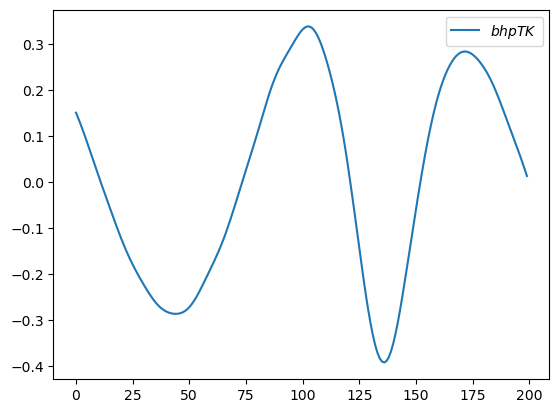

In [56]:

M = 4e6

mu = 10e-2
p0 = 6.15
e0 = 0.0
theta = np.pi/2  # polar viewing angle
phi =0# azimuthal viewing angle
dt = 10
# 1s=1.651×10e-10M
wave = few(M, mu, p0, e0, theta, phi, dt=dt, T=200)  #
t = np.arange(len(wave)) *dt

realdata=np.loadtxt("output.txt")


np.size(realdata)

# plt.plot(10**+17*mu*realdata[0:250]/p0,label=r'$sage$')
plt.plot(wave.real[:200],label=r'$bhpTK$')
# plt.plot(wave.imag[:2000],label =r'$h_x$')
plt.legend()
plt.show()

In [ ]:
import astorpy as ap 